In [14]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [15]:
dataset=datasets.load_breast_cancer()
dataset

print(dataset.data.shape)
print(dataset.target.shape)

(569, 30)
(569,)


In [16]:
print(dataset.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [17]:
print(dataset.target_names)

['malignant' 'benign']


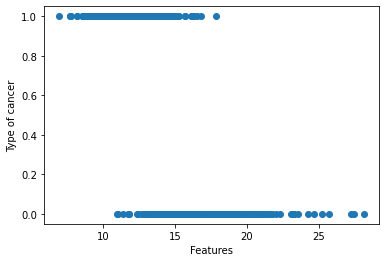

In [18]:
plt.scatter(dataset.data[:, 0], dataset.target)
plt.xlabel('Features')
plt.ylabel('Type of cancer') # 1-malignant # 0-benign
plt.show()

In [19]:
kmeans = KMeans(n_clusters=10, random_state=101)
prediction = kmeans.fit_predict(dataset.data)
print(prediction)

kmeans.cluster_centers_.shape
print(kmeans.cluster_centers_)

[4 4 8 7 8 3 8 3 3 3 9 2 2 9 3 9 9 2 1 3 7 0 9 1 4 2 9 2 2 2 8 3 2 4 2 2 3
 7 3 3 3 7 8 3 3 8 0 3 7 3 7 3 7 2 9 7 4 9 7 0 0 0 9 0 3 9 0 7 0 7 4 0 8 3
 7 2 7 8 8 7 7 7 1 2 7 8 3 8 7 3 3 3 3 3 9 8 7 0 7 3 3 0 7 0 0 3 7 7 1 7 0
 7 3 0 0 7 0 9 2 2 7 8 1 3 7 3 3 8 3 8 7 9 2 9 8 7 7 7 9 0 0 2 7 7 0 7 7 3
 3 3 7 0 0 0 3 7 2 9 7 7 7 8 4 7 1 3 0 2 8 3 7 9 9 0 0 0 0 9 7 7 5 4 2 7 9
 0 2 7 7 7 3 7 0 3 3 7 3 2 8 9 7 2 1 9 7 9 0 2 7 9 8 7 1 9 3 3 7 0 4 1 3 3
 0 9 3 3 0 3 7 3 2 7 7 4 0 3 5 4 3 2 3 7 7 3 8 0 7 7 0 7 4 7 4 2 4 3 4 9 2
 9 4 2 2 9 2 5 0 3 7 0 3 7 1 0 2 7 7 2 3 3 8 7 8 9 7 7 7 7 0 7 3 3 7 7 7 3
 0 7 3 0 4 7 8 0 7 7 7 0 3 3 7 3 7 7 0 7 7 8 0 7 0 8 7 4 7 7 3 7 9 9 9 7 0
 7 7 2 7 4 0 5 3 0 0 8 7 0 7 9 7 7 7 9 5 9 7 7 7 3 0 0 7 7 7 9 3 4 8 7 5 1
 2 3 8 4 3 9 0 3 3 7 7 0 7 7 7 3 7 3 7 2 0 0 2 4 7 3 3 7 7 7 2 7 7 7 7 7 9
 7 2 7 7 7 0 9 9 7 0 8 7 7 7 3 7 3 0 0 0 7 0 7 3 7 8 8 3 3 7 3 3 3 7 2 3 0
 2 7 2 3 3 4 7 8 7 3 7 3 7 7 7 0 8 6 3 7 3 3 3 0 2 7 0 7 9 7 0 7 3 3 7 9 7
 3 3 3 9 7 3 8 7 9 7 2 2 

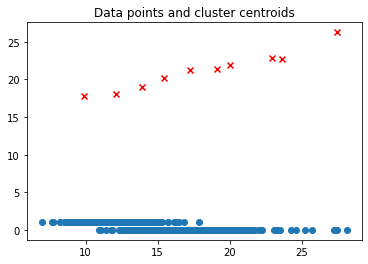

In [20]:
plt.scatter(dataset.data[:, 0], dataset.target)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [21]:
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset.target, labels)

0.9068541300527241

Text(91.68, 0.5, 'predicted label')

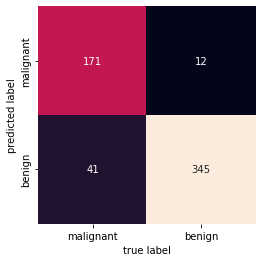

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=dataset.target_names,yticklabels=dataset.target_names)

#ax.set_ylim(10,10)
plt.xlabel('true label')
plt.ylabel('predicted label')